<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

# 모델링(Modeling) 기법 선택

현재 올리지는 못했지만 올리고 싶었던 선택 알고리즘을 통해 모델링할 기법을 고름.

- 데이터가 글이나 시계열은 아님
- 범주를 예측함
- 데이터가 식별값을 가짐
- 그렇다면 분류에 해당함(로지스틱 회귀, 선형, 최근접, svm, 딥러닝, 의사결정 나무 등...)
- 위 기법 중 "생존을 했느냐? 마느냐?" 2가지 중에 판단하는 로지스틱이 좋아보임.

# 로지스틱 회귀란

데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측 =>  2진 분류(binary classification) => 우리의 생존 분석에 적합해 보임

로지스틱 회귀에 대한 자세한 내용은 아래 URL에서 확인

참고 : <span> https://hleecaster.com/ml-logistic-regression-concept/ </span>

# 로지스틱 회귀 실습

## 라이브러리 및 파일 불러오기

1. 라이브러리 불러오기
2. 파일 불러오기
3. 파일 전처리 (이부분은 앞에서 완료)

In [4]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

# 모델링에 필요한 라이브러리
from sklearn.linear_model import LogisticRegression

# 평가를 위한 라이브러리 설치
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc # 정확도, 민감도 등
from sklearn.model_selection import cross_val_score # Auc 관련

In [5]:
# 파일 불러오기 및 확인
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 데이터 분할

In [6]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## 모델링 및 모델 평가

1. 모델 만들기
2. 테스트 데이터로 예측
3. 모델 평가
4. 피드백 및 수정
5. 모델 평가

### 모델링

사이킷런 함수의 파라미터 설명
- penalty
  > - 설정 가능 값 : 'l1', 'l2', 'elasticnet', 'none' (1차, 2차, 1차+2차 혼합, 미규제)
  > - 디폴트 값 : 'l2'
  > - 모델에 대한 규제 방법을 선택

- C
  > - penalty에 대한 계수 설정
  > - 디폴트 값 : 1.0
  > - 높을 수록 복잡한 모델에 대한 규제 강화

- solver
  > - 설정 가능 값 : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ (알고리즘의 종류 선택)
  > - 디폴트 값 : 'lbfgs'
  > - 로지스틱 회귀는 비선형 방정식이라 근사 알고리즘으로 접근 
  > - 특정 solver는 일부 penalty 방식을 지원하지 않을 수도 있음

- max_iter
  > - solver의 수렴의 반복 횟수를 정해놓는 것 
  > - 경우에 따라 수렴이 오래 걸리는 경우도 존재

- random_state
  > - 실행 시마다 결과를 고정하고 싶다면 임의의 정수로 설정
  > - 근사 알고리즘의 초기 상태가 실행 시마다 달라질 수 있어서 초기값을 일정하게 고정시킴

In [7]:
# 로지스틱 회귀 모델 #

## 모델링
lr_model = LogisticRegression(random_state = 5)

## 적합(=학습)
lr_model.fit(X_train, Y_train)

c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

### 모델 평가

1. 테스트 데이터로 예측
2. 모델 평가 지표들로 평가
 - 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
 - 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율
 - 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율 (= 민감도)
 - F-score : 정밀도와 재현율의 가중조화평균 (정밀도에 주어지는 가중치인 베타가 1인 경우 => F1-score)
 - ROC 곡선 : 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화
   - AUC(Area Under the Curve)는 ROC curve의 면적

In [8]:
# 테스트 데이터로 예측 #
y_pred = lr_model.predict(X_test)

In [9]:
# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,148,26
Real_False,20,74


In [10]:
# 데이터 셋 평가 비교 #
print("데이터 셋 평가 비교 ")
print("Train Set Score : {}".format(lr_model.score(X_train, Y_train)))
print("Test  Set Score : {}".format(lr_model.score(X_test, Y_test)))

데이터 셋 평가 비교 
Train Set Score : 0.826645264847512
Test  Set Score : 0.8283582089552238


In [11]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       174
           1       0.74      0.79      0.76        94

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [12]:
# 직접 확인 
print("< Logistic Regression >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Logistic Regression >
잘못 분류된 샘플 수 : 46
정확도(Accuracy) : 0.8283582089552238
정밀도(Precision) : 0.74
재현율(Recall) : 0.7872340425531915
F1_Score : 0.7628865979381443


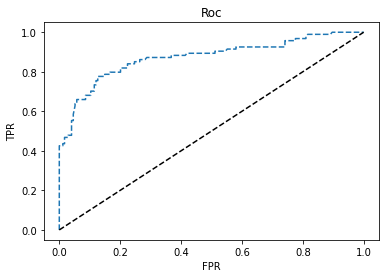

In [13]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, lr_model.decision_function(X_test))

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [14]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = lr_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Logistic Regression ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[ Logistic Regression ] Roc_Auc : 0.8556092517006804 (+/- 0.02876736678840359)


c:\Users\82108\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 변수와 각 변수의 영향
print(X_train.columns)
print(lr_model.coef_)

Index(['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family'], dtype='object')
[[ 2.94228462e+00  2.47321007e-01  5.61545688e-01 -9.82364690e-01
  -3.53218627e-02  1.81643088e-03 -5.29984433e-01]]
